In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [69]:
usedcars = pd.read_csv("usedcars_noisy.csv",index_col=0)

In [70]:
usedcars.head(10)

model  price  mileage   color transmission
year                                           
2011   SEL  21992     7413  Yellow         AUTO
2011   SEL  20995    10926    Gray         AUTO
2011   SEL  29995       -1    Gray         AUTO
2011   SEL  19995     7351  Silver         AUTO
2011   SEL  17809    11613    Gray         AUTO
2012    SE  17500     8367   White         AUTO
2010   SEL  17495    25125  Silver         AUTO
2010   SES      0       -1  Silver         AUTO
2011   SEL  17000    27393    Blue         AUTO
2010   SEL  16995    21026  Silver         AUTO

We can see there are some noise in our data. some price variable values as 0 and -1 for mileage which is completely wrong as no car can have price zero or a mileage in negative. So Let's clean our data first.

In [71]:
price_mean= usedcars['price'].mean()

In [72]:
price_mean

12717.55

In [73]:
mileage_median= usedcars['mileage'].median()

In [74]:
mileage_median

36120.0

Replace the noisy price and mileage data with the mean price and median mileage, respectively.

In [75]:
usedcars.price=usedcars.price.replace({0:price_mean})

In [76]:
usedcars.mileage=usedcars.mileage.replace({-1:mileage_median})

In [77]:
usedcars.model.unique()

array(['SEL', 'SE', 'SES'], dtype=object)

In [78]:
usedcars.model=usedcars.model.replace({'SEL':1, 'SE':2,'SES':3})

In [79]:
usedcars.transmission=usedcars.transmission.replace({'AUTO':1, 'MANUAL':2})

In [80]:
usedcars.color.unique()

array(['Yellow', 'Gray', 'Silver', 'White', 'Blue', 'Black', 'Green',
       'Red', 'Gold'], dtype=object)

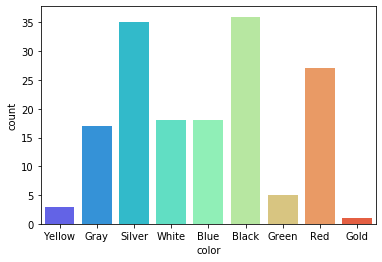

In [81]:
sns.countplot(x='color', palette='rainbow', data=usedcars)

In [82]:
usedcars.transmission=usedcars.transmission.replace({1:0, 2:1})

In [83]:
usedcars.color=usedcars.color.replace({'Yellow':0, 'Gray':1, 'Silver':2, 'White':3, 'Blue':4, 'Black':5, 'Green':6,'Red':7, 'Gold':8})

In [84]:
usedcars.tail(10)

model     price   mileage  color  transmission
year                                                
2004      3   6980.00  101130.0      1             0
2004      3   6950.00  119720.0      5             0
2006      3   6200.00   95000.0      2             0
2002      2   5995.00   87003.0      7             0
2000      2   5980.00   96841.0      7             0
2001      2   4899.00  151479.0      0             0
2000      2   3800.00  109259.0      7             0
2010      3  12717.55   16035.0      7             1
2005      3   8488.00   36120.0      7             0
2004      2  12717.55   36120.0      2             0

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x= usedcars.drop('price', axis=1)

In [87]:
y= usedcars['price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm= LinearRegression()

In [91]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lm.coef_

array([-5.09997990e+02, -9.38200120e-02, -2.86411730e+02, -4.33890185e+02])

In [93]:
predictions= lm.predict(X_test)

In [94]:
predictions[0]

13952.759891339592

In [95]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

Coefficient
model         -509.997990
mileage         -0.093820
color         -286.411730
transmission  -433.890185

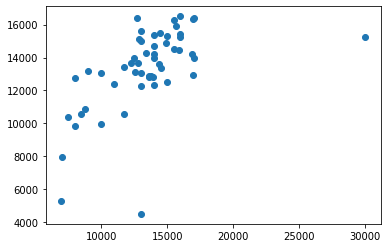

In [96]:
plt.scatter(y_test,predictions)

In [102]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1830.0098474827475
MSE: 8697906.259948697
RMSE: 2949.221297215368
